# Data Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.plotly as py
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

#plotly.tools.set_credentials_file(username='xxxxx', api_key='xxxxxx')

In [2]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

In [3]:
data = pd.read_csv('Data/spl_clean.csv')

In [4]:
data.head(3)

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
0   Physical      Horizon         BOOK          2016              6   
1    Digital    OverDrive        EBOOK          2016              6   
2   Physical      Horizon    SOUNDDISC          2016              6   

   Checkouts                                              Title  \
0          1  Capitalism unbound : the incontestable moral c...   
1          2  A Fountain Filled With Blood: Clare Fergusson ...   
2          3        And winter came-- [sound recording] / Enya.   

                 Creator                                           Subjects  \
0       Bernstein Andrew                                         Capitalism   
1  Julia Spencer Fleming                                   Fiction  Mystery   
2                   Enya  Christmas music  New Age music  Popular music ...   

                      Publisher  PublicationYear  
0  University Press of America,             9999  
1          Macmillan Publishers             2013  
2                      Reprise,             9999

In [5]:
data.shape

(33156891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33156891 entries, 0 to 33156890
Data columns (total 11 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutYear       int64
CheckoutMonth      int64
Checkouts          int64
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    int64
dtypes: int64(4), object(7)
memory usage: 2.7+ GB


In [7]:
data.isna().sum()

UsageClass         0
CheckoutType       0
MaterialType       0
CheckoutYear       0
CheckoutMonth      0
Checkouts          0
Title              0
Creator            0
Subjects           0
Publisher          0
PublicationYear    0
dtype: int64

In [8]:
#Categorical 

data.describe(include='object').T

count   unique              top      freq
UsageClass    33156891        2         Physical  26662540
CheckoutType  33156891        5          Horizon  26662540
MaterialType  33156891       25             BOOK  18783118
Title         33156891  1579115  <Unknown Title>     72539
Creator       33156891   346064          Unknown  11922671
Subjects      33156891   788067          Unknown   1721680
Publisher     33156891    83227          Unknown   9495830

In [10]:
# Numeric 

data.describe()

CheckoutYear  CheckoutMonth     Checkouts  PublicationYear
count  3.315689e+07   3.315689e+07  3.315689e+07     3.315689e+07
mean   2.012214e+03   6.477814e+00  3.510537e+00     6.879827e+03
std    3.958880e+00   3.458806e+00  8.379664e+00     3.898199e+03
min    2.005000e+03   1.000000e+00  1.000000e+00     1.174000e+03
25%    2.009000e+03   3.000000e+00  1.000000e+00     2.011000e+03
50%    2.012000e+03   6.000000e+00  2.000000e+00     9.999000e+03
75%    2.016000e+03   9.000000e+00  3.000000e+00     9.999000e+03
max    2.019000e+03   1.200000e+01  2.073000e+03     9.999000e+03

------
# Visual Analysis

### Physical vs Digital Comparison

In [11]:
usage = data['UsageClass'].value_counts()
usage.iplot(kind='bar', yTitle='Number of Checkouts', title='Checkout Formats')

### Total checkuts over the years

In [12]:
traces = []
year_comp = data.groupby(['CheckoutYear', 'UsageClass']).size().unstack()
for c in year_comp.columns:
    traces.append({'type':'bar', 'x':year_comp.index, 'y':year_comp[c], 'name':c})
fig = {'data':traces, 'layout':{'barmode':'stack','xaxis':{'title':'Checkout formats over the years'},}}

py.iplot(fig)

* Physical formats are most common. The library offers different sources for digital checkouts of books and music mainly; digital checkouts declined last year. 
* Possible recomendations: promote digital content at the library branches. Available format tabs are displayed in the online catalog with little information (only the word eBook) and some audiences may not understand or be familiar that this includes downloading and reading in their Kindles, NOOKs, phones, computers/tablets, MP3 players, etc.

#### 2016 and 2017 had the most number of chekouts:

In [16]:
year_1617 = data[data.CheckoutYear == (2016 or 2017)]

sorted_checkouts = year_1617.sort_values('Checkouts', ascending=False)
sorted_checkouts.head(10)

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
32486485   Physical      Horizon        MIXED          2016              3   
6753394    Physical      Horizon        MIXED          2016             10   
32213791   Physical      Horizon        MIXED          2016              2   
7194953    Physical      Horizon        MIXED          2016             12   
523357     Physical      Horizon        MIXED          2016              8   
32621058   Physical      Horizon        MIXED          2016              4   
32866574   Physical      Horizon        MIXED          2016              5   
203284     Physical      Horizon        MIXED          2016              7   
6968826    Physical      Horizon        MIXED          2016             11   
93421      Physical      Horizon        MIXED          2016              6   

          Checkouts                                              Title  \
32486485        668  SPL HotSpot : connecting Seattle / [distribute...   
6753394         657  SPL HotSpot : connecting Seattle / [distribute...   
32213791        656  SPL HotSpot : connecting Seattle / [distribute...   
7194953         645  SPL HotSpot : connecting Seattle / [distribute...   
523357          635  SPL HotSpot : connecting Seattle / [distribute...   
32621058        634  SPL HotSpot : connecting Seattle / [distribute...   
32866574        620  SPL HotSpot : connecting Seattle / [distribute...   
203284          619  SPL HotSpot : connecting Seattle / [distribute...   
6968826         619  SPL HotSpot : connecting Seattle / [distribute...   
93421           616  SPL HotSpot : connecting Seattle / [distribute...   

          Creator                                           Subjects  \
32486485  Unknown  Wireless LANs, Wireless Internet, Wireless com...   
6753394   Unknown  Wireless LANs, Wireless Internet, Wireless com...   
32213791  Unknown  Wireless LANs, Wireless Internet, Wireless com...   
7194953   Unknown  Wireless LANs, Wireless Internet, Wireless com...   
523357    Unknown  Wireless LANs, Wireless Internet, Wireless com...   
32621058  Unknown  Wireless LANs, Wireless Internet, Wireless com...   
32866574  Unknown  Wireless LANs, Wireless Internet, Wireless com...   
203284    Unknown  Wireless LANs, Wireless Internet, Wireless com...   
6968826   Unknown  Wireless LANs, Wireless Internet, Wireless com...   
93421     Unknown  Wireless LANs, Wireless Internet, Wireless com...   

                  Publisher  PublicationYear  
32486485  Verizon Wireless,             9999  
6753394   Verizon Wireless,             9999  
32213791  Verizon Wireless,             9999  
7194953   Verizon Wireless,             9999  
523357    Verizon Wireless,             9999  
32621058  Verizon Wireless,             9999  
32866574  Verizon Wireless,             9999  
203284    Verizon Wireless,             9999  
6968826   Verizon Wireless,             9999  
93421     Verizon Wireless,             9999

Looks like in building devices were largely used, is this the case for all years?:

In [17]:
large_checkouts = data.loc[data.Checkouts > 900]
large_checkouts.sort_values('Checkouts', ascending=False)

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
5583710   Physical      Horizon        MIXED          2018             10   
5164252   Physical      Horizon        MIXED          2018              8   
5504701   Physical      Horizon        MIXED          2018              9   
5840206    Digital        Zinio     MAGAZINE          2018             11   
4516054   Physical      Horizon        MIXED          2018              5   
4788782   Physical      Horizon        MIXED          2018              6   
5008341   Physical      Horizon        MIXED          2018              7   
6310838    Digital        Zinio     MAGAZINE          2019              1   
4321384   Physical      Horizon        MIXED          2018              4   
4005196   Physical      Horizon        MIXED          2018              3   
3614776   Physical      Horizon        MIXED          2018              1   
5971636    Digital        Zinio     MAGAZINE          2018             12   
3963647   Physical      Horizon        MIXED          2018              2   
6355668    Digital    OverDrive    AUDIOBOOK          2019              1   
6474581    Digital        Zinio     MAGAZINE          2019              2   
3305225   Physical      Horizon        MIXED          2017             12   

         Checkouts                                              Title  \
5583710       2073                                 FlexTech--Laptops.   
5164252       1830                                 FlexTech--Laptops.   
5504701       1699                                 FlexTech--Laptops.   
5840206       1683                                     The New Yorker   
4516054       1681                        In Building Device Checkout   
4788782       1555                                 FlexTech--Laptops.   
5008341       1439                                 FlexTech--Laptops.   
6310838       1347                                     The New Yorker   
4321384       1318                        In Building Device Checkout   
4005196       1195                        In Building Device Checkout   
3614776       1175                        In Building Device Checkout   
5971636       1148                                     The New Yorker   
3963647       1140                        In Building Device Checkout   
6355668       1044  The Life-Changing Magic of Tidying Up: The Jap...   
6474581        996                                     The New Yorker   
3305225        988                        In Building Device Checkout   

             Creator                                           Subjects  \
5583710      Unknown  Laptop computers, iPad Computer, Tablet computers   
5164252      Unknown  Laptop computers, iPad Computer, Tablet computers   
5504701      Unknown  Laptop computers, iPad Computer, Tablet computers   
5840206      Unknown                                            Unknown   
4516054      Unknown  Laptop computers, iPad Computer, Tablet computers   
4788782      Unknown  Laptop computers, iPad Computer, Tablet computers   
5008341      Unknown  Laptop computers, iPad Computer, Tablet computers   
6310838      Unknown                                            Unknown   
4321384      Unknown  Laptop computers, iPad Computer, Tablet computers   
4005196      Unknown  Laptop computers, iPad Computer, Tablet computers   
3614776      Unknown  Laptop computers, iPad Computer, Tablet computers   
5971636      Unknown                                            Unknown   
3963647      Unknown  Laptop computers, iPad Computer, Tablet computers   
6355668  Marie Kondo  Home Design & Décor, Nonfiction, Self-Improvement   
6474581      Unknown                                            Unknown   
3305225      Unknown  Laptop computers, iPad Computer, Tablet computers   

                 Publisher  PublicationYear  
5583710            Lenovo,             9999  
5164252            Lenovo,             9999  
5504701            Lenovo,             999

* In building devices are largely used and count for most of the checkouts per month along with The New Yorker Magazine.

### Checkouts by vendor 

In [18]:
check_type = data.groupby('CheckoutType').size()
fig = {'data' : [{ 'type':'bar', 'x' : check_type.values.tolist(), 'y':check_type.index.tolist(), 'orientation':'h'}],
        'layout' : {
            'title' : 'Vendor Tool'
                    }
        }

py.iplot(fig)

### Checkouts by format

In [19]:
material_type = data.groupby('MaterialType').size()
fig = {'data' : [{ 'type':'bar', 'y' : material_type.values.tolist(), 'x':material_type.index.tolist()}],
        'layout' : {
            'title' : 'Material Format'
                    }
        }

py.iplot(fig)

### Most Read Book for Each Month

In [9]:
#Make a DF with sorted checkouts

most_books = data.loc[data.MaterialType == 'BOOK']
most_books.sort_values('Checkouts', ascending=False, inplace=True)
most_books.head()

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
5747238   Physical      Horizon         BOOK          2018             10   
3142070   Physical      Horizon         BOOK          2017             11   
6377048   Physical      Horizon         BOOK          2019              1   
3204948   Physical      Horizon         BOOK          2017             11   
3331451   Physical      Horizon         BOOK          2017             12   

         Checkouts                                            Title  \
5747238        847  Fear : Trump in the White House / Bob Woodward.   
3142070        810           Two kinds of truth / Michael Connelly.   
6377048        801                       Becoming / Michelle Obama.   
3204948        782                   The midnight line / Lee Child.   
3331451        778                   The midnight line / Lee Child.   

                   Creator                                           Subjects  \
5747238      Woodward Bob   Trump Donald       United States Politics and ...   
3142070  Connelly Michael   Bosch Harry Fiction  Detective and mystery fic...   
6377048    Obama Michelle   Obama Michelle       Presidents spouses United...   
3204948          Child Lee  Reacher Jack Fictitious character Fiction  Mur...   
3331451          Child Lee  Reacher Jack Fictitious character Fiction  Mur...   

                          Publisher  PublicationYear  
5747238           Simon & Schuster,             2018  
3142070  Little, Brown and Company,             2017  
6377048                      Crown,             9999  
3204948            Delacorte Press,             9999  
3331451            Delacorte Press,             9999

In [10]:
# group by year and month

grouped = most_books.groupby(['CheckoutYear','CheckoutMonth'])
grouped.first()

UsageClass CheckoutType MaterialType  Checkouts  \
CheckoutYear CheckoutMonth                                                   
2005         4               Physical      Horizon         BOOK        249   
             5               Physical      Horizon         BOOK        448   
             6               Physical      Horizon         BOOK        484   
             7               Physical      Horizon         BOOK        327   
             8               Physical      Horizon         BOOK        415   
             9               Physical      Horizon         BOOK        420   
             10              Physical      Horizon         BOOK        440   
             11              Physical      Horizon         BOOK        418   
             12              Physical      Horizon         BOOK        389   
2006         1               Physical      Horizon         BOOK        396   
             2               Physical      Horizon         BOOK        399   
             3               Physical      Horizon         BOOK        443   
             4               Physical      Horizon         BOOK        342   
             5               Physical      Horizon         BOOK        302   
             6               Physical      Horizon         BOOK        326   
             7               Physical      Horizon         BOOK        364   
             8               Physical      Horizon         BOOK        356   
             9               Physical      Horizon         BOOK        322   
             10              Physical      Horizon         BOOK        281   
             11              Physical      Horizon         BOOK        267   
             12              Physical      Horizon         BOOK        271   
2007         1               Physical      Horizon         BOOK        284   
             2               Physical      Horizon         BOOK        240   
             3               Physical      Horizon         BOOK        279   
             4               Physical      Horizon         BOOK        258   
             5               Physical      Horizon         BOOK        294   
             6               Physical      Horizon         BOOK        263   
             7               Physical      Horizon         BOOK        282   
             8               Physical      Horizon         BOOK        341   
             9               Physical      Horizon         BOOK        297   
...                               ...          ...          ...        ...   
2016         9               Physical      Horizon         BOOK        260   
             10              Physical      Horizon         BOOK        343   
             11              Physical      Horizon         BOOK        476   
             12              Physical      Horizon         BOOK        407   
2017         1               Physical      Horizon         BOOK        429   
             2               Physical      Horizon         BOOK        335   
             3               Physical      Horizon         BOOK        286   
             4               Physical      Horizon         BOOK        250   
             5               Physical      Horizon         BOOK        414   
             6               Physical      Horizon         BOOK        389   
             7               Physical      Horizon         BOOK        391   
             8               Physical      Horizon         BOOK        395   
             9               Physical      Horizon         BOOK        477   
             10              Physical      Horizon         BOOK        443   
             11              Physical      Horizon         BOOK        810   
             12              Physical      Horizon         BOOK        778   
2018         1               Physical      Horizon         BOOK        668   
             2               Physical      Horizon         BOOK        684   
             3               Physical      Horizo

### Checkouts by month over the years

In [22]:
by_month = data.groupby('CheckoutMonth').size()
fig = {'data' : [{ 'type':'bar', 'y' : by_month.values.tolist(), 'x':by_month.index.tolist()}],
        'layout' : {
            'title' : 'Monthly Checkouts Over The Years'
                    }
        }

py.iplot(fig)

### Subjects

In [23]:
subjects = data.Subjects.value_counts()
subjects[:50]

Unknown                                             1721680
Fiction, Mystery                                     341765
Fiction, Literature                                  333115
Rock music 2001 2010                                 193824
Fiction, Romance                                     166464
Fiction, Historical Fiction, Romance                 157254
Fiction, Thriller                                    127904
Fantasy, Fiction                                     120929
Juvenile Fiction, Juvenile Literature                119422
Popular music 2001 2010                              101585
Fiction, Science Fiction                              99335
Biography & Autobiography, Nonfiction                 97880
History, Nonfiction                                   85392
Cooking & Food, Nonfiction                            81781
Fantasy, Fiction, Romance                             80009
Rock music 1991 2000                                  78411
Business, Nonfiction                    

In [24]:
known_subjects = subjects.drop(labels=['Unknown'])

In [25]:
subjects_50 = known_subjects[:50]

In [26]:
fig = {'data' : [{ 'type':'bar', 'y' : subjects_50.values.tolist(), 'x':subjects_50.index.tolist()}],
        'layout' : {
            'title' : '50 Subjects'
                    }
        }

py.iplot(fig)

### Creator

In [15]:
authors = data.Creator.value_counts()
authors[:50]

Unknown                      11922671
James Patterson                 24386
Patterson James                 22665
Rylant Cynthia                  20043
Agatha Christie                 16922
Nora Roberts                    16334
Meadows Daisy                   15721
Christie Agatha                 15558
Osborne Mary Pope               15105
Stilton Geronimo                12600
Seuss Dr                        12598
McCall Smith Alexander          12256
Adler David A                   11927
Warner Gertrude Chandler        11867
Yolen Jane                      11640
King Stephen                    11472
Shakespeare William             11002
Stephen King                    10960
Gibbons Gail                    10559
Bach Johann Sebastian           10546
Robert B  Parker                10536
J  A  Jance                     10535
Keene Carolyn                   10501
Debbie Macomber                 10466
Roberts Nora                     9775
Wells Rosemary                   9554
Mary Pope Os

In [16]:
known_authors = authors.drop(labels=['Unknown'])

In [17]:
fig = {'data' : [{ 'type':'bar', 'y' : known_authors.values.tolist(), 'x':known_authors.index.tolist()}],
        'layout' : {
            'title' : '50 Authors'
                    }
        }

py.iplot(fig)

The draw time for this plot will be slow for all clients.


### Publisher

In [20]:
publishers = data.Publisher.value_counts()
publishers[:51]

Unknown                                          9495830
Random House, Inc.                                828044
Penguin Group (USA), Inc.                         625739
HarperCollins Publishers Inc.                     591399
Books on Tape                                     357846
Blackstone Audio, Inc.                            353808
Macmillan Publishers                              228799
Hachette Digital, Inc.                            221434
Thorndike Press,                                  198220
Random House,                                     190678
Simon & Schuster, Inc.                            168774
Viking,                                           126096
Candlewick Press,                                 120828
HarperCollins,                                    120149
Harlequin Enterprises, Ltd.                       116596
Warner Home Video,                                114695
Simon & Schuster,                                 109269
Tantor Media, Inc              

In [21]:
known_publishers = publishers.drop(labels=['Unknown'])

In [22]:
fig = {'data' : [{ 'type':'bar', 'y' : known_publishers.values.tolist(), 'x':known_publishers.index.tolist()}],
        'layout' : {
            'title' : 'Top 50 Publishers'
                    }
        }

py.iplot(fig)

The draw time for this plot will be slow for all clients.



---------

-----------



### Text columns insights
Here I tried to manipulate strings to find the most common authors (name and last name together) 

In [29]:
sample = pd.read_csv('Data/sampleDF.csv')

In [15]:
import nltk

from nltk.collocations import *
from nltk import FreqDist, word_tokenize

In [3]:
sample.Creator.value_counts()

Unknown                                 35804
Rylant, Cynthia                            92
James Patterson                            79
Patterson, James, 1947-                    74
Agatha Christie                            55
Nora Roberts                               50
Stilton, Geronimo                          48
Christie, Agatha, 1890-1976                46
Osborne, Mary Pope                         44
Adler, David A.                            41
Yolen, Jane                                40
Macomber, Debbie                           37
J. A. Jance                                36
Evanovich, Janet                           34
King, Stephen, 1947-                       34
Gibbons, Gail                              34
Robert B. Parker                           34
Stephen King                               33
Meadows, Daisy                             33
David Baldacci                             33
McCall Smith, Alexander, 1948-             32
Debbie Macomber                   

In [88]:
#remove puntuaction

sample['Creator'] = sample['Creator'].str.replace("[^a-zA-Z#]", " ")

In [94]:
sample['Creator'][22]

'Toboso  Yana       '

In [95]:
# lowercase, remove stop and short words

stopwords_list = stopwords.words('english')

In [96]:
def process_article(author):
    tokens = nltk.word_tokenize(author) 
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list and len(token) > 2]
    return stopwords_removed

In [97]:
processed_data = list(map(process_article, sample['Creator']))

In [98]:
print(processed_data[5])
print(processed_data[120])
print(processed_data[225])
print(processed_data[5022])
print(processed_data[48736])

['unknown']
['schertle', 'alice']
['evans', 'blanche']
['unknown']
['jane', 'porter']


In [99]:
common_words = []

for word in processed_data:
    common_words += word
word_freq = FreqDist(common_words)

In [100]:
word_dic = word_freq.most_common(30)
word_dic

[('unknown', 35804),
 ('group', 1650),
 ('musical', 1604),
 ('john', 1231),
 ('david', 1184),
 ('james', 958),
 ('michael', 863),
 ('robert', 788),
 ('mary', 555),
 ('peter', 527),
 ('richard', 525),
 ('william', 492),
 ('paul', 482),
 ('elizabeth', 435),
 ('susan', 418),
 ('stephen', 395),
 ('george', 389),
 ('charles', 388),
 ('mark', 381),
 ('jane', 375),
 ('the', 356),
 ('smith', 352),
 ('thomas', 343),
 ('anne', 336),
 ('scott', 329),
 ('ann', 324),
 ('martin', 315),
 ('barbara', 311),
 ('jennifer', 307),
 ('lee', 302)]

In [101]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [102]:
author_finder = BigramCollocationFinder.from_words(word_dic)

In [103]:
author_scored = author_finder.score_ngrams(bigram_measures.raw_freq)

In [104]:
author_scored[:50]

[((('ann', 324), ('martin', 315)), 0.03333333333333333),
 ((('anne', 336), ('scott', 329)), 0.03333333333333333),
 ((('barbara', 311), ('jennifer', 307)), 0.03333333333333333),
 ((('charles', 388), ('mark', 381)), 0.03333333333333333),
 ((('david', 1184), ('james', 958)), 0.03333333333333333),
 ((('elizabeth', 435), ('susan', 418)), 0.03333333333333333),
 ((('george', 389), ('charles', 388)), 0.03333333333333333),
 ((('group', 1650), ('musical', 1604)), 0.03333333333333333),
 ((('james', 958), ('michael', 863)), 0.03333333333333333),
 ((('jane', 375), ('the', 356)), 0.03333333333333333),
 ((('jennifer', 307), ('lee', 302)), 0.03333333333333333),
 ((('john', 1231), ('david', 1184)), 0.03333333333333333),
 ((('mark', 381), ('jane', 375)), 0.03333333333333333),
 ((('martin', 315), ('barbara', 311)), 0.03333333333333333),
 ((('mary', 555), ('peter', 527)), 0.03333333333333333),
 ((('michael', 863), ('robert', 788)), 0.03333333333333333),
 ((('musical', 1604), ('john', 1231)), 0.03333333333

In [105]:
author_pmi_finder = BigramCollocationFinder.from_words(word_dic)

In [106]:
author_pmi_finder.apply_freq_filter(1)

In [107]:
author_pmi_scored = author_pmi_finder.score_ngrams(bigram_measures.pmi)

In [111]:
author_pmi_scored[:50]

[((('ann', 324), ('martin', 315)), 4.906890595608519),
 ((('anne', 336), ('scott', 329)), 4.906890595608519),
 ((('barbara', 311), ('jennifer', 307)), 4.906890595608519),
 ((('charles', 388), ('mark', 381)), 4.906890595608519),
 ((('david', 1184), ('james', 958)), 4.906890595608519),
 ((('elizabeth', 435), ('susan', 418)), 4.906890595608519),
 ((('george', 389), ('charles', 388)), 4.906890595608519),
 ((('group', 1650), ('musical', 1604)), 4.906890595608519),
 ((('james', 958), ('michael', 863)), 4.906890595608519),
 ((('jane', 375), ('the', 356)), 4.906890595608519),
 ((('jennifer', 307), ('lee', 302)), 4.906890595608519),
 ((('john', 1231), ('david', 1184)), 4.906890595608519),
 ((('mark', 381), ('jane', 375)), 4.906890595608519),
 ((('martin', 315), ('barbara', 311)), 4.906890595608519),
 ((('mary', 555), ('peter', 527)), 4.906890595608519),
 ((('michael', 863), ('robert', 788)), 4.906890595608519),
 ((('musical', 1604), ('john', 1231)), 4.906890595608519),
 ((('paul', 482), ('eliza

In [113]:
detok_set = [] 
for i in range(len(sample)): 
    t = ' '.join(processed_data[i]) 
    detok_set.append(t) 

sample['Creator'] = detok_set

In [114]:
sample.head(3)

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
0    Digital      Freegal         SONG          2018              2   
1    Digital      Freegal         SONG          2017              7   
2   Physical      Horizon    SOUNDDISC          2013              5   

   Checkouts                                              Title  \
0          1                             The Music Of The Night   
1          1                                            Opaline   
2          1  Girls and boys [sound recording] / Ingrid Mich...   

                             Creator  \
0  susan boyle feat michael crawford   
1                          dishwalla   
2                  michaelson ingrid   

                                        Subjects          Publisher  \
0                                        Unknown            Unknown   
1                                        Unknown            Unknown   
2  Popular music 2001 2010, Rock music 2001 2010  Cabin 24 Records,   

   PublicationYear _Season _check_eq_publ  
0             9999  Winter             No  
1             9999  Summer             No  
2             9999  Spring             No

In [123]:
sample.Creator.value_counts()

unknown                             35804
                                      136
rylant cynthia                         92
james patterson                        79
patterson james                        74
agatha christie                        55
beaton                                 54
nora roberts                           50
christie agatha                        50
stilton geronimo                       48
robb                                   46
musical group                          44
osborne mary pope                      44
adler david                            41
yolen jane                             40
macomber debbie                        37
jance                                  36
evanovich janet                        34
king stephen                           34
robert parker                          34
gibbons gail                           34
meadows daisy                          33
david baldacci                         33
stephen king                      

In [ ]:
sample.groupby()

In [ ]:
from wordcloud import STOPWORDS


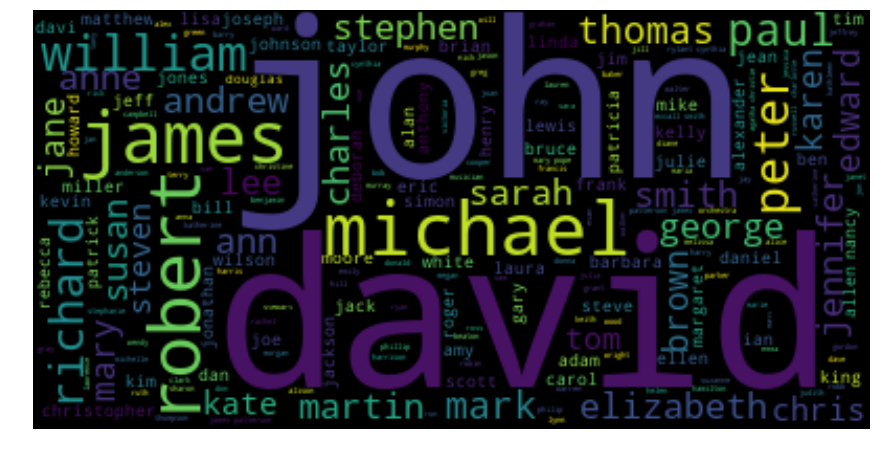

In [121]:

plt.figure(figsize=(15,10))

text = " ".join(author for author in sample.Creator)

stopwords = set(STOPWORDS)
stopwords.update(['unknown', 'group', 'musical'])

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
sample = pd.read_csv('Data/sampleDF.csv')

In [76]:
sample.head(2)

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
0    Digital      Freegal         SONG          2018              2   
1    Digital      Freegal         SONG          2017              7   

   Checkouts                   Title                             Creator  \
0          1  The Music Of The Night  Susan Boyle feat. Michael Crawford   
1          1                 Opaline                           Dishwalla   

  Subjects Publisher  PublicationYear _Season _check_eq_publ  
0  Unknown   Unknown             9999  Winter             No  
1  Unknown   Unknown             9999  Summer             No

In [77]:
sample['Split'] = sample['Creator'].str.replace("[^a-zA-Z#]", " ")
sample.head(2)

UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
0    Digital      Freegal         SONG          2018              2   
1    Digital      Freegal         SONG          2017              7   

   Checkouts                   Title                             Creator  \
0          1  The Music Of The Night  Susan Boyle feat. Michael Crawford   
1          1                 Opaline                           Dishwalla   

  Subjects Publisher  PublicationYear _Season _check_eq_publ  \
0  Unknown   Unknown             9999  Winter             No   
1  Unknown   Unknown             9999  Summer             No   

                                Split  
0  Susan Boyle feat  Michael Crawford  
1                           Dishwalla

In [79]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

In [80]:
from nltk import word_tokenize

def process_article(name):
    tokens = nltk.word_tokenize(name) 
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list and len(token) > 3]
    return stopwords_removed

In [82]:
import nltk

processed_data = list(map(process_article, sample['Split']))

In [85]:
common_words = []

for word in processed_data:
    common_words += word
word_freq = FreqDist(common_words)

In [86]:
word_freq.most_common(50)

[('unknown', 35804),
 ('group', 1650),
 ('musical', 1604),
 ('john', 1231),
 ('david', 1184),
 ('james', 958),
 ('michael', 863),
 ('robert', 788),
 ('mary', 555),
 ('peter', 527),
 ('richard', 525),
 ('william', 492),
 ('paul', 482),
 ('elizabeth', 435),
 ('susan', 418),
 ('stephen', 395),
 ('george', 389),
 ('charles', 388),
 ('mark', 381),
 ('jane', 375),
 ('smith', 352),
 ('thomas', 343),
 ('anne', 336),
 ('scott', 329),
 ('martin', 315),
 ('barbara', 311),
 ('jennifer', 307),
 ('sarah', 300),
 ('brown', 292),
 ('brian', 288),
 ('karen', 280),
 ('lisa', 279),
 ('kate', 279),
 ('nancy', 256),
 ('eric', 253),
 ('laura', 252),
 ('margaret', 252),
 ('andrew', 250),
 ('christopher', 245),
 ('bill', 242),
 ('simon', 222),
 ('chris', 221),
 ('jack', 220),
 ('daniel', 219),
 ('frank', 219),
 ('williams', 215),
 ('king', 210),
 ('philip', 209),
 ('linda', 208),
 ('steve', 207)]

In [92]:
from nltk.collocations import *

author_pmi_finder = BigramCollocationFinder.from_words(common_words)

In [93]:
author_pmi_finder.apply_freq_filter(5)

In [95]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [96]:
author_pmi_scored = author_pmi_finder.score_ngrams(bigram_measures.pmi)

In [97]:
author_pmi_scored[:50]

[(('baratz', 'logsted'), 15.018765251221637),
 (('dixie', 'chicks'), 15.018765251221637),
 (('feldhahn', 'shaunti'), 15.018765251221637),
 (('indri', 'ason'), 15.018765251221637),
 (('lynyrd', 'skynyrd'), 15.018765251221637),
 (('marinina', 'aleksandra'), 15.018765251221637),
 (('princeton', 'review'), 15.018765251221637),
 (('ruurs', 'margriet'), 15.018765251221637),
 (('satrapi', 'marjane'), 15.018765251221637),
 (('aardema', 'verna'), 14.755730845387841),
 (('ausma', 'zehanat'), 14.755730845387841),
 (('drive', 'truckers'), 14.755730845387841),
 (('global', 'television'), 14.755730845387841),
 (('hurston', 'zora'), 14.755730845387841),
 (('ihara', 'shigekatsu'), 14.755730845387841),
 (('konomi', 'takeshi'), 14.755730845387841),
 (('orchestral', 'uvres'), 14.755730845387841),
 (('rebel', 'motorcycle'), 14.755730845387841),
 (('selectmedia', 'entertainment'), 14.755730845387841),
 (('shiina', 'karuho'), 14.755730845387841),
 (('snelling', 'lauraine'), 14.755730845387841),
 (('toboso',